In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv(r"C:\Users\User\PyCharmMiscProject\Datasets\insurance.csv")
df.isna().sum()
df.duplicated().sum()
df.drop_duplicates(inplace=True)
print(df.isna().sum())
df


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

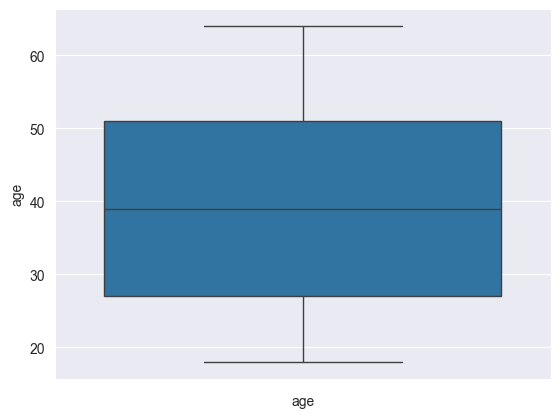

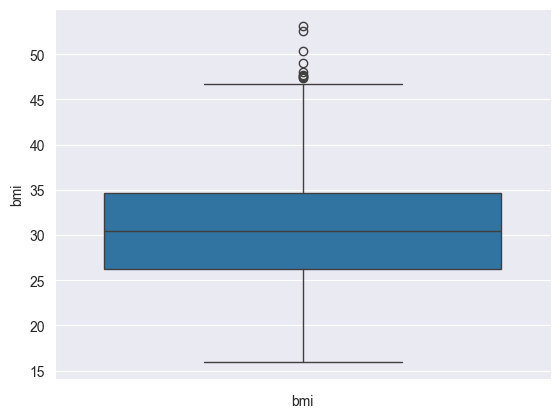

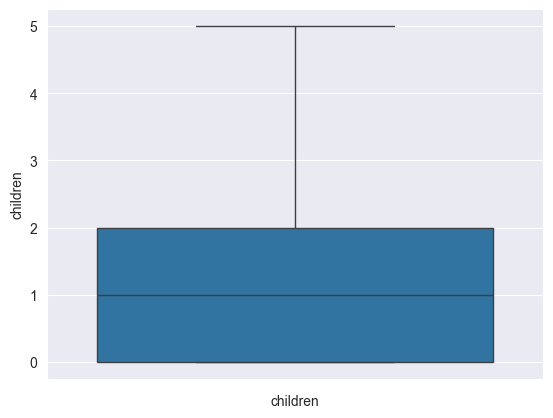

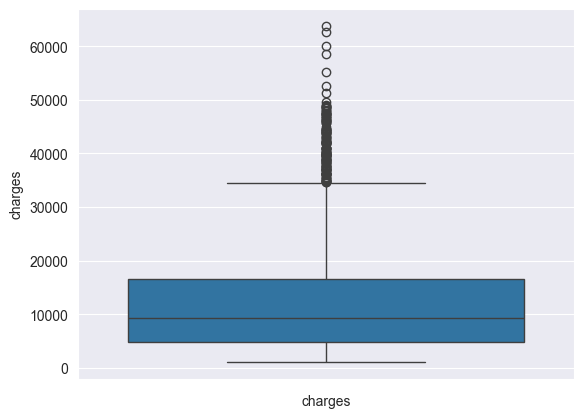

               age          bmi     children       charges
count  1337.000000  1337.000000  1337.000000   1337.000000
mean     39.222139    30.663452     1.095737  13279.121487
std      14.044333     6.100468     1.205571  12110.359656
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.290000     0.000000   4746.344000
50%      39.000000    30.400000     1.000000   9386.161300
75%      51.000000    34.700000     2.000000  16657.717450
max      64.000000    53.130000     5.000000  63770.428010


In [7]:
for col in df.columns:
    if df[col].dtype != "object":
        sns.boxplot(df[col])
        plt.xlabel(col)
        plt.show()

print(df.describe())

In [20]:
df["log_charges"] = np.log(df["charges"])
df['charges'].skew()
#df['log_charges'].skew()
df

,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,0,27.900,0,1,3,16884.92400,9.734176
1,18,1,33.770,1,0,2,1725.55230,7.453302
2,28,1,33.000,3,0,2,4449.46200,8.400538
3,33,1,22.705,0,0,1,21984.47061,9.998092
4,32,1,28.880,0,0,1,3866.85520,8.260197
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,9.268661
1334,18,0,31.920,0,0,0,2205.98080,7.698927
1335,18,0,36.850,0,0,2,1629.83350,7.396233
1336,21,0,25.800,0,0,3,2007.94500,7.604867


In [9]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

for col in df.columns:
    if df[col].dtype == "object":
        df[col] = LE.fit_transform(df[col])

In [21]:
X = df.drop(['charges', 'log_charges'], axis=1)
Y = df["charges"]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.80, random_state=87)


In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [23]:
y_pred = lr.predict(X_test)
y_pred

array([  634.07436066, 23959.17996298, 33982.30439392, ...,
        7207.14923485, 13951.06294614, 32010.1983181 ], shape=(1070,))

In [24]:
result = pd.DataFrame(columns = ['Actual','Predicted'])
result['Actual'] = Y_test
result['Predicted'] = y_pred
result


,Actual,Predicted
137,2045.68525,634.074361
126,17081.08000,23959.179963
262,24869.83680,33982.304394
591,8428.06930,5977.636868
102,21344.84670,2411.540606
...,...,...
974,2322.62180,5328.258904
1172,11093.62290,16904.449702
861,7151.09200,7207.149235
528,8342.90875,13951.062946


In [26]:
from sklearn.metrics import r2_score
r2 = (r2_score(Y_test, y_pred)*100)
r_sq = np.round(r2)

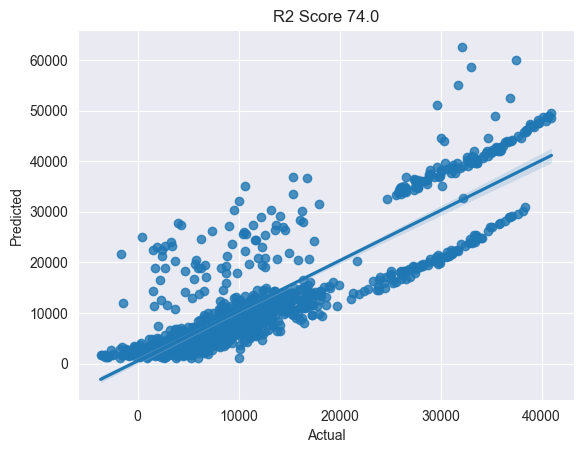

In [27]:
sns.regplot(x=y_pred, y=Y_test)
plt.title(f'R2 Score {r_sq}')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()